<a href="https://colab.research.google.com/github/Kishorecsmani/ScalerProject/blob/main/RetailCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='33A2FF'><b> **Problem Statement**

<font color='33A2FF'>1) To analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. 

<font color='33A2FF'>2) Do women spend more on Black Friday than men? 

<font color='33A2FF'>3) Which Age group spend more on Black Friday?

<font color='33A2FF'>4) Unmarried and married customer- Who has spent more on Black Friday ?

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df = pd.read_csv("data.csv")
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


<font color='33A2FF'><b>1.Identification of variables and data types:</b></font>


In [ ]:
#rows ans columns of data
df.shape

(550068, 10)

In [ ]:
#checking datatypes
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
# Number of records with No Null value
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


<font color='33A2FF'><b>2.Analysing the basic metrics :</b></font>

In [ ]:
# describe on column having integer data type
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
df.describe(include=[np.number])

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.describe(include=[np.object])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [ ]:
#checking null values in every column of our data
df.isnull().sum()/len(df)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

<font color='#0dab7f'>No missing/null values in all the columns Hence Missing value treatment is not required</font>

In [ ]:
#number of unique values in our data
for i in df.columns:
  print(i, " : ", df[i].nunique())

User_ID  :  5891
Product_ID  :  3631
Gender  :  2
Age  :  7
Occupation  :  21
City_Category  :  3
Stay_In_Current_City_Years  :  5
Marital_Status  :  2
Product_Category  :  20
Purchase  :  18105


##<font color='33A2FF'><b> **UNIVARIATE ANALYSIS**

In [ ]:
# PurchaseSlab
bins_Purcahse = [0, 3000, 6000, 9000, 12000, 15000, 18000, 180001 ]
labels_Purchase = ['0-3000','3001-6000','6001-9000', '9001-12000', '12001-15000', '15001 - 18000', '18001-above']
df['PurchaseSlab'] = pd.cut(df['Purchase'], bins_Purcahse,labels=labels_Purchase)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,PurchaseSlab
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,6001-9000
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,15001 - 18000
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,0-3000
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,0-3000
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,6001-9000
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368,0-3000
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371,0-3000
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137,0-3000
550066,1006038,P00375436,F,55+,1,C,2,0,20,365,0-3000


In [ ]:
#Function for Univariate plot for numerical
def univariateNumerical(df, col):
  print("Describe Method")
  print(df[col].describe())
  print('\n\n')
  print("Value count Method")
  print(df[col].value_counts().head(10))
  plt.figure(figsize=(25,5))
  plt.subplot(1,2,1)
  plt.title("HIST PLOT")
  sns.histplot(data = df, x= col, kde=True, color = 'orange' )
  #plt.subplot(1,3,2)
  #plt.title("COUNT PLOT")
  #sns.countplot(data = df, x= col)
  plt.subplot(1,2,2)
  plt.title("BOX PLOT")
  sns.boxplot(x = col, data = df, color = 'green')
  plt.show()

In [ ]:
#Function for Univariate plot for Discrete
def univariateDiscrete(df, col):
  print("Describe Method")
  print(df[col].describe())
  print('\n\n')
  print("Value count Method")
  print(df[col].value_counts().head(10))
  plt.figure()  
  plt.title("COUNT PLOT")
  sns.countplot(data = df, x= col)
  plt.xticks(rotation = 90)
  plt.show()

<font color='33A2FF'><b> Missing Value & Outlier Detection 

In [ ]:
# Function to calculate outlier range
def outlier(df, col): 
  r = 1.5 * stats.iqr(df[col])
  lb = max(np.percentile(df[col], 25) - r, 0)
  ub = np.percentile(df[col], 75) + r
  print(" ")
  print('\033[1m'+'\033[95m' +'OUTLIER FOR COLUMN : '+ col )
  print("Outliers:",sum(df[col] > ub) + sum(df[col] < lb))
  print("Lower limit", lb)
  print("Upper limit", ub ,'\033[0m')

In [ ]:
def outlierRemoval(df, col): 
  r = 1.5 * stats.iqr(df[col])
  lb = max(np.percentile(df[col], 25) - r, 0)
  ub = np.percentile(df[col], 75) + r
  df = df[(df[i]>=lb) & (df[i]<=ub)]
  return df

Describe Method
count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64



Value count Method
7011    191
7193    188
6855    187
6891    184
7012    183
6960    183
6879    182
7166    182
7027    182
6868    180
Name: Purchase, dtype: int64


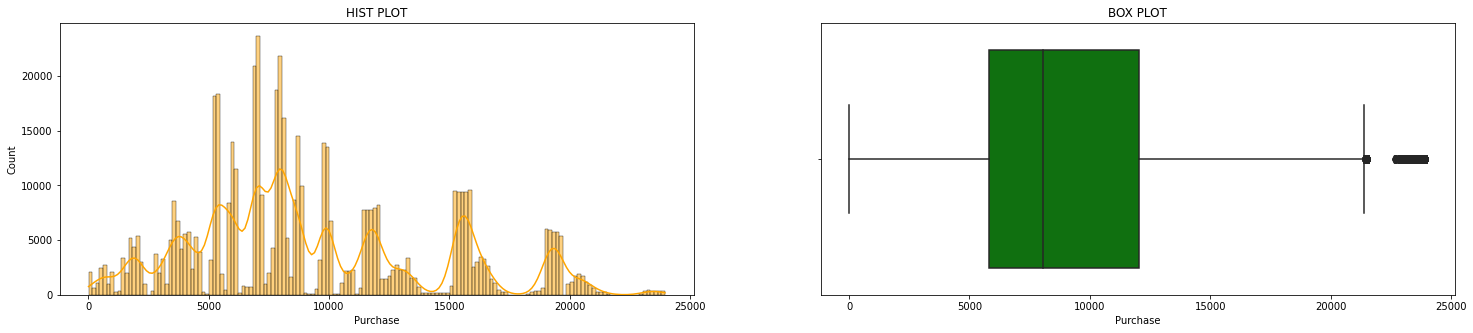

 
OUTLIER FOR COLUMN : Purchase
Outliers: 2677
Lower limit 0
Upper limit 21400.5 


In [ ]:
# Purchase
univariateNumerical(df, 'Purchase')
outlier(df, 'Purchase')

Describe Method
count        550068
unique            7
top       6001-9000
freq         178257
Name: PurchaseSlab, dtype: object



Value count Method
6001-9000        178257
3001-6000        110717
9001-12000        78658
15001 - 18000     66463
18001-above       44060
0-3000            41897
12001-15000       30016
Name: PurchaseSlab, dtype: int64


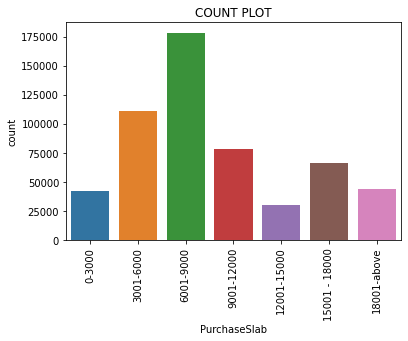

In [ ]:
#PurchaseSlab - derived column for purchase
univariateDiscrete(df, 'PurchaseSlab')

<font color='#0dab7f'><b>Observation</b>: Most Customers buy around range of 8000 </font>


<font color='#0dab7f'><b>Outlier</b> : Purchase - Before outlier removal. Lower limit 0 and upper limit 21400.5 with 2677 values out of range</font>

Describe Method
count    547391.000000
mean       9195.627195
std        4938.872953
min          12.000000
25%        5721.000000
50%        8038.000000
75%       12019.000000
max       21399.000000
Name: Purchase, dtype: float64



Value count Method
7011    191
7193    188
6855    187
6891    184
7012    183
6960    183
7027    182
7166    182
6879    182
6883    180
Name: Purchase, dtype: int64


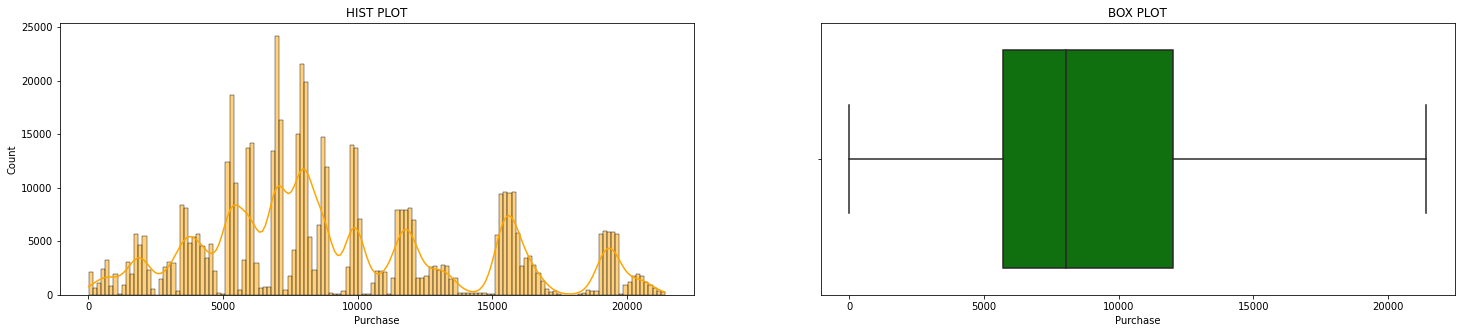

 
OUTLIER FOR COLUMN : Purchase
Outliers: 0
Lower limit 0
Upper limit 21466.0 


In [ ]:
# Outlier removal in purchase column
df = outlierRemoval(df, 'Purchase')
# Outlier check after removal of outlier in purcahse column
univariateNumerical(df, 'Purchase')
outlier(df, 'Purchase')

<font color='#0dab7f'><b>Outlier</b> : Purchase - After outlier removal. Lower limit 0 and upper limit 21466. outlier has been removed</font>

Describe Method
count    547391.000000
mean          5.378945
std           3.927383
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: Product_Category, dtype: float64



Value count Method
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      5963
Name: Product_Category, dtype: int64


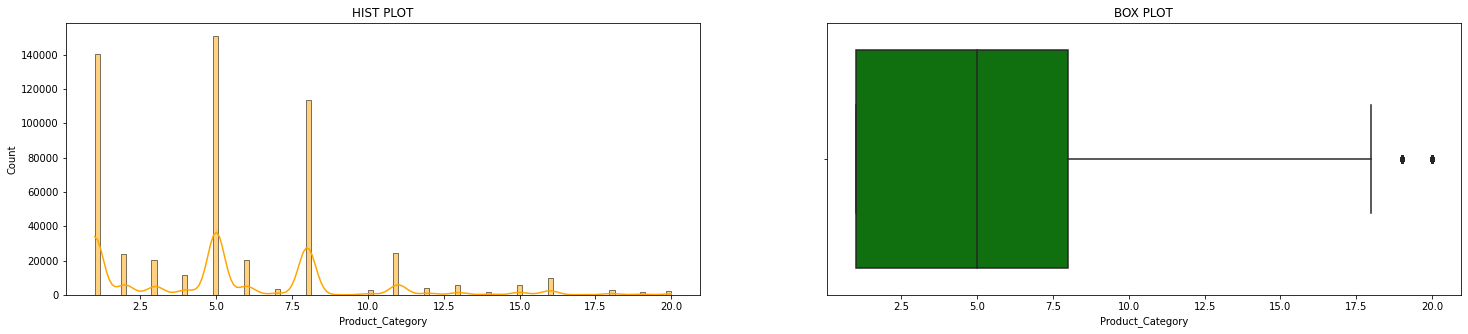

 
OUTLIER FOR COLUMN : Product_Category
Outliers: 4153
Lower limit 0
Upper limit 18.5 


In [ ]:
#Product_Category
univariateNumerical(df, 'Product_Category')
outlier(df, 'Product_Category')

<font color='#0dab7f'><b>Observation</b>: Customers buying mostly product category 5, 1, 8 </font>

<font color='#0dab7f'><b>Recommendation</b> : Company can increase sales by increasing Product category 5, 1, 8 </font>

<font color='#0dab7f'><b>Outlier</b> : No Outlier treatment as this categorical column</font>

Describe Method
count    547391.000000
mean          8.074627
std           6.521586
min           0.000000
25%           2.000000
50%           7.000000
75%          14.000000
max          20.000000
Name: Occupation, dtype: float64



Value count Method
4     72040
0     69310
7     58875
1     47174
17    39855
20    33355
12    30995
14    27173
2     26435
16    25251
Name: Occupation, dtype: int64


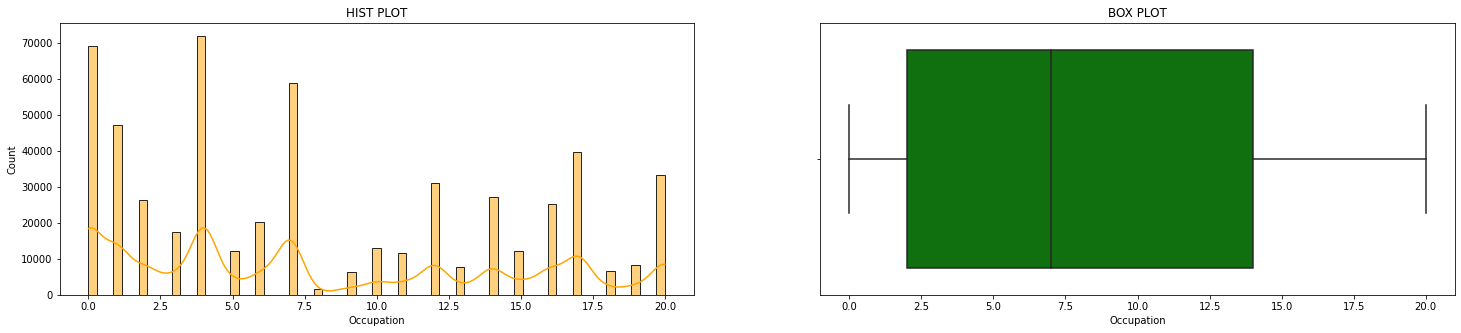

 
OUTLIER FOR COLUMN : Occupation
Outliers: 0
Lower limit 0
Upper limit 32.0 


In [ ]:
#Occupation
univariateNumerical(df, 'Occupation')
outlier(df, 'Occupation')

<font color='#0dab7f'><b>Observation</b>: More Company Customers are from occupation type 4, 0 and 7</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can attract customers from occupation type 4, 0 and 7 to increase sales</font>

<font color='#0dab7f'><b>Outlier</b> : Occupation - Lower limit 0 and upper limit 32 with 0 values out of range, So no outlier treatment required</font>

Describe Method
count     547391
unique         5
top            1
freq      192845
Name: Stay_In_Current_City_Years, dtype: object



Value count Method
1     192845
2     101384
3      94804
4+     84322
0      74036
Name: Stay_In_Current_City_Years, dtype: int64


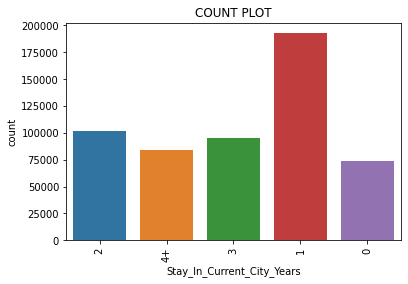

In [ ]:
#Stay_In_Current_City_Years
univariateDiscrete(df, 'Stay_In_Current_City_Years')

<font color='#0dab7f'><b>Observation</b>: Most Customers of Company are 1 year in current city  </font>

<font color='#0dab7f'><b>Recommendation</b> :Company can attract customers who are new to City to increase sales</font>

Describe Method
count     547391
unique         3
top            B
freq      230114
Name: City_Category, dtype: object



Value count Method
B    230114
C    170241
A    147036
Name: City_Category, dtype: int64


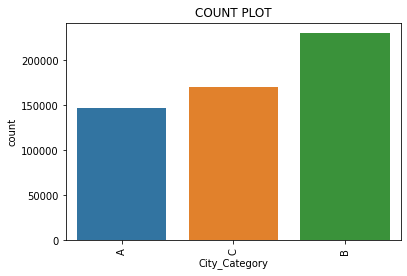

In [ ]:
#City_Category
univariateDiscrete(df, 'City_Category')

<font color='#0dab7f'><b>Observation</b>: Most Company Customers are from City category B </font>

<font color='#0dab7f'><b>Recommendation</b> : Company can attract more customers from city category B </font>

Describe Method
count     547391
unique         7
top        26-35
freq      218661
Name: Age, dtype: object



Value count Method
26-35    218661
36-45    109409
18-25     99334
46-50     45442
51-55     38191
55+       21322
0-17      15032
Name: Age, dtype: int64


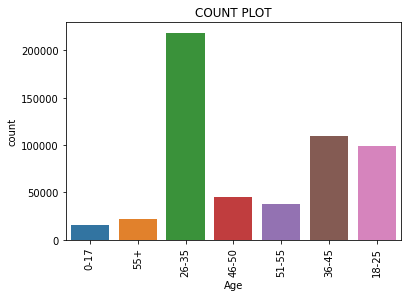

In [ ]:
#Age
univariateDiscrete(df, 'Age')

<font color='#0dab7f'><b>Observation</b>: Most Company Customers are in the age group 26- 35 years </font>

<font color='#0dab7f'><b>Recommendation</b> : Company can attract new customers in the age group 26- 35 years</font>

Describe Method
count    547391.000000
mean          0.409486
std           0.491739
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Marital_Status, dtype: float64



Value count Method
0    323242
1    224149
Name: Marital_Status, dtype: int64


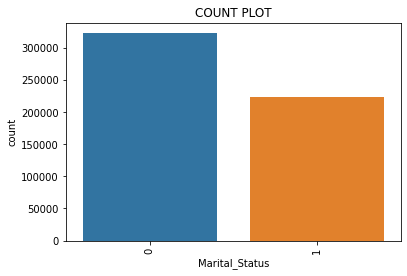

In [ ]:
#Marital_Status
univariateDiscrete(df, 'Marital_Status')

<font color='#0dab7f'><b>Observation</b>: Most Company Customers are unmarried </font>

<font color='#0dab7f'><b>Recommendation</b> :Company can attract unmarried customers</font>

Describe Method
count     547391
unique         2
top            M
freq      412171
Name: Gender, dtype: object



Value count Method
M    412171
F    135220
Name: Gender, dtype: int64


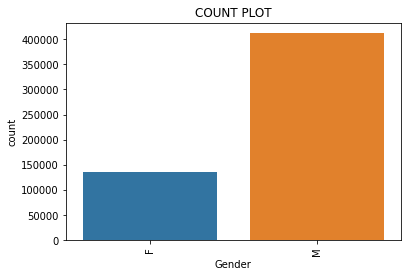

In [ ]:
#Gender
univariateDiscrete(df, 'Gender')

<font color='#0dab7f'><b>Observation</b>: Most Company Customers are male </font>

<font color='#0dab7f'><b>Recommendation</b> :Company can attract more new male customers </font>

##<font color='33A2FF'><b> **BIVARIATE ANALYSIS**

In [ ]:
# function for Continuous vs discrete BIVARIATE Analysis
def cont_discrete_bivarite(df, x_dis, y_con):
  plt.figure(figsize=(25,5))
  plt.subplot(1,3,1)
  plt.title("BOX PLOT")
  sns.boxplot(data = df, x= x_dis, y= y_con)
  plt.xticks(rotation = 90)
  plt.subplot(1,3,2)
  plt.title("VIOLIN PLOT")
  sns.violinplot(data = df, x= x_dis, y= y_con)
  plt.xticks(rotation = 90)
  plt.subplot(1,3,3)
  plt.title("BAR PLOT")
  sns.barplot(data = df, x= x_dis, y= y_con)
  plt.xticks(rotation = 90)
  plt.show()

In [ ]:
# function for discrete vs discrete BIVARIATE Analysis
def discrete_discrete_bivarite(df, x_dis, hue):
  plt.figure(figsize=(15,5))
  plt.subplot(1,1,1)
  plt.title("COUNT PLOT")
  sns.countplot(data = df, x= x_dis, hue=hue)
  plt.show()

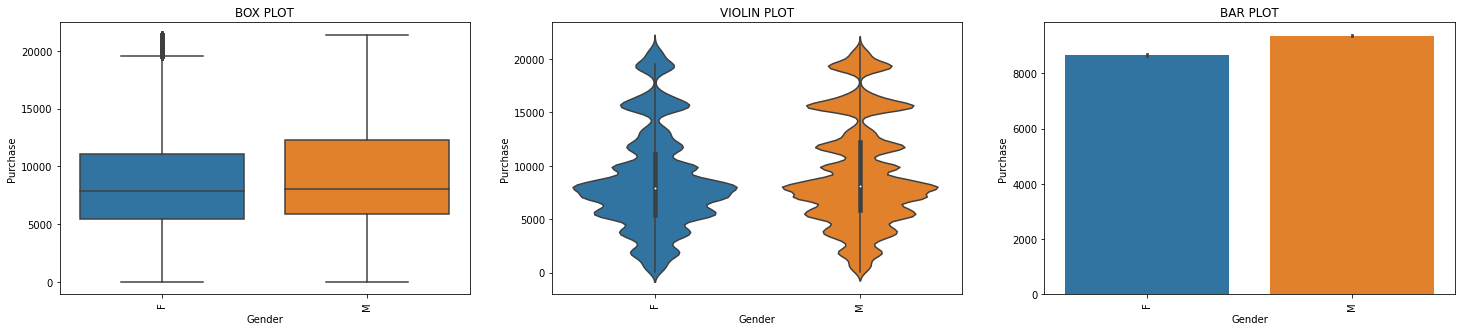

In [ ]:
# Bivariate Gender and Purchase
cont_discrete_bivarite(df, 'Gender' ,'Purchase')

<font color='#0dab7f'><b>Observation</b>: Male customers purchased more when compared to Female customers in Company stores during Black Friday </font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target male customers to increase there sales during Black Friday.</font>

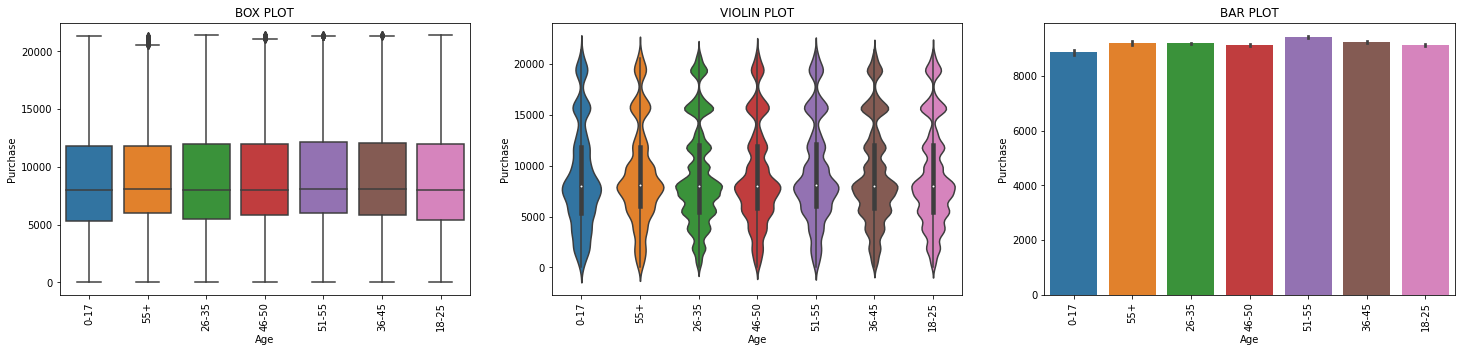

In [ ]:
# Bivariate Age and Purchase
cont_discrete_bivarite(df, 'Age' ,'Purchase')

<font color='#0dab7f'><b>Observation</b>: Customers aged 51 years + purchased more when compared to other aged customers in Company stores during Black Friday</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target customers aged 51+ years to increase there sales during Black Friday.</font>

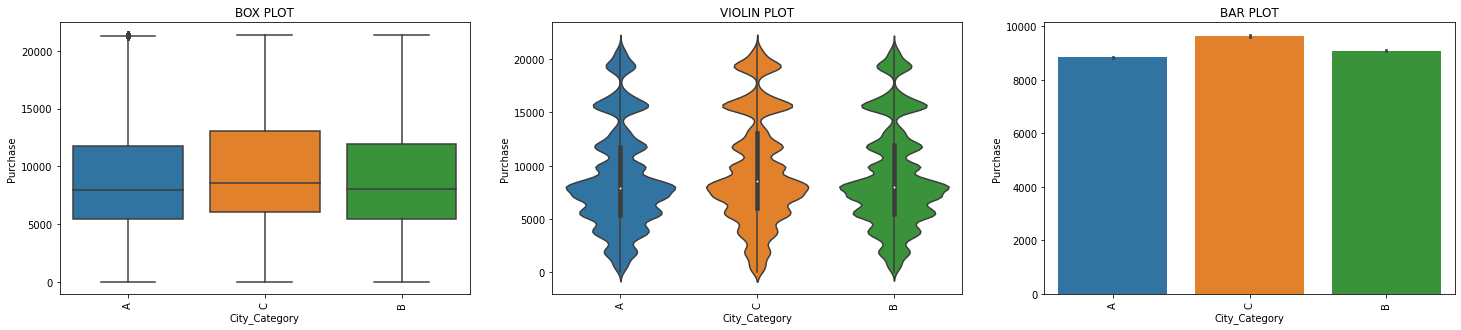

In [ ]:
# Bivariate City_Category and Purchase
cont_discrete_bivarite(df, 'City_Category' ,'Purchase')

<font color='#0dab7f'><b>Observation</b>: Customers in city category C has purchased more when compared to other city categories in Company stores during Black Friday</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can increase there sales by providing offers to category C city customers.</font>

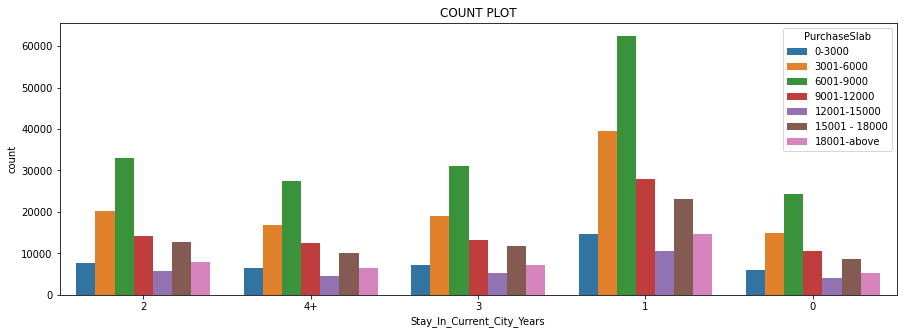

In [ ]:
# Bivariate Stay_In_Current_City_Years and PurchaseSlab
discrete_discrete_bivarite(df, 'Stay_In_Current_City_Years' ,'PurchaseSlab')

<font color='#0dab7f'><b>Observation</b>: Customers with 1 year of stay in current city has purchased more around 60000 transactions and each transaction range '6000 to 9000' in Company stores during Black Friday</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can increase there sales by providing offers to customers who are new to city.</font>

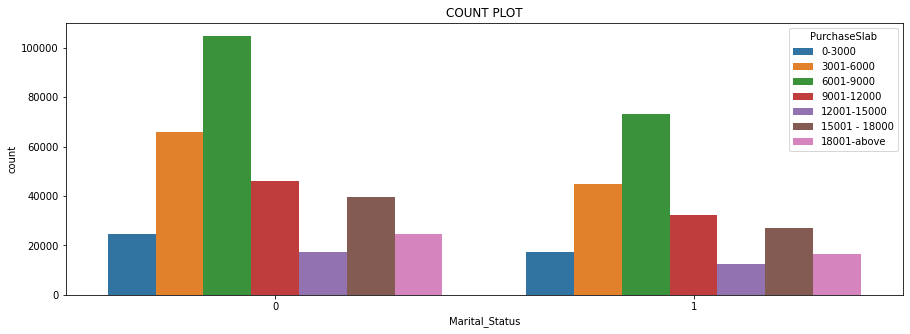

In [ ]:
# Bivariate Marital_Status and PurchaseSlab
discrete_discrete_bivarite(df, 'Marital_Status' ,'PurchaseSlab')

<font color='#0dab7f'><b>Observation</b>: Customers who are unmarried has purchased around 100000 transactions and each transactions range '6000 to 9000' in in Company stores during Black Friday</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can target customers who are unmarried to increase there sales during Black Friday.</font>

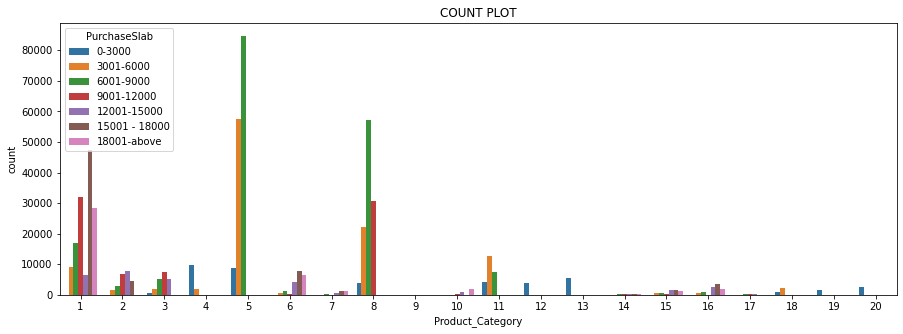

In [ ]:
# Bivariate Product_Category and PurchaseSlab
discrete_discrete_bivarite(df, 'Product_Category' ,'PurchaseSlab')

<font color='#0dab7f'><b>Observation</b>: Customers who purchased product category 5 has purchased around 80000 transactions and each transactions range '6000 to 9000' in Company stores during Black Friday</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can  increase there sales by providing offers on product category 5.</font>

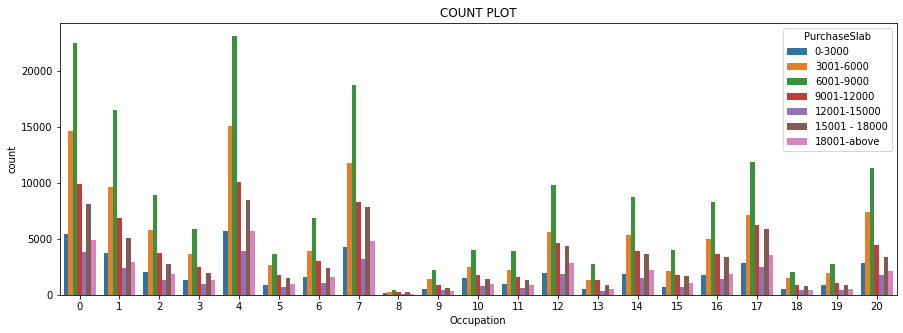

In [ ]:
# Bivariate Occupation and PurchaseSlab
discrete_discrete_bivarite(df,  'Occupation', 'PurchaseSlab')

<font color='#0dab7f'><b>Observation</b>: Customers with occupation group 4 has purchased around 20000 transactions and each transactions range '6000 to 9000' in Company stores during Black Friday</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can increase there sales by providing offers to occupation group is 4.</font>

**<font color='33A2FF'><b>CORRELATION MATRIX**

In [ ]:
df_corr = df.corr()
df_corr

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.024127,0.020311,0.003631,0.004102
Occupation,-0.024127,1.000000,0.024128,-0.008180,0.020428
Marital_Status,0.020311,0.024128,1.000000,0.019591,-0.001448
Product_Category,0.003631,-0.008180,0.019591,1.000000,-0.370128
Purchase,0.004102,0.020428,-0.001448,-0.370128,1.000000


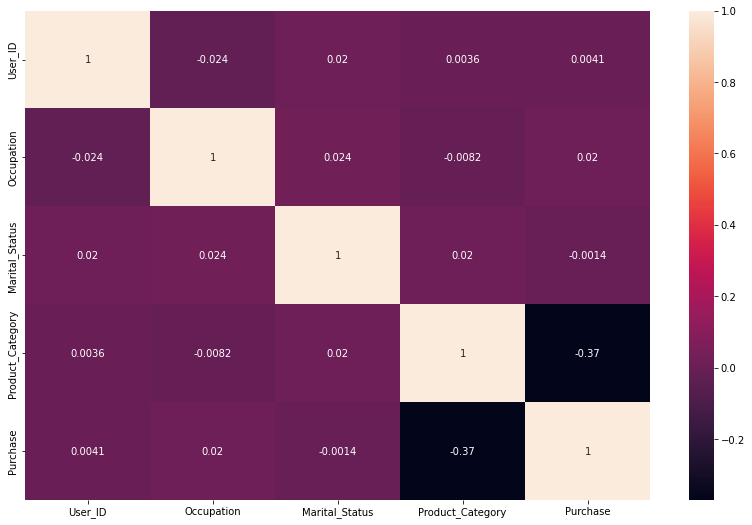

In [ ]:
# HeatMap: All continuos variables

plt.subplots(figsize=(14, 9))
sns.heatmap(df_corr, xticklabels=df_corr.columns.values, yticklabels=df_corr.columns.values, annot = True)
plt.show()

<font color='#0dab7f'> No correlation found between the numerical values

<font color='33A2FF'><b>Tracking the amount spent per transaction of female and male customers, calculate the average

In [ ]:
print("Mean for Male/female for Gender column")
print(df.groupby('Gender')['Purchase'].mean())
print()
print("Standard Deviation for Male/female for Gender column")
print(df.groupby('Gender')['Purchase'].std())

Mean for Male/female for Gender column
Gender
F    8671.049039
M    9367.724355
Name: Purchase, dtype: float64

Standard Deviation for Male/female for Gender column
Gender
F    4679.058483
M    5009.234088
Name: Purchase, dtype: float64


<font color='#0dab7f'><b>Observation</b>:
<font color='#0dab7f'>Purchase amount by Male customers in Company store on black friday is around 9367 which is more compared to Female customers 8671

<font color='#0dab7f'><b>Recommendation</b>:
<font color='#0dab7f'>Average male customers expense is more when compared to Female customer expense. Hence Company can target male customers to increase their business

<font color='33A2FF'><b>CONFIDENCE INTERVAL

In [ ]:
def ConfidenceInterval1(df, col, category):
  print("Confidence interval -", col,":", category)
  df_p_f = df.loc[df[col]== category]['Purchase']
  print(df_p_f.shape)
  size = 1000
  bootstraped_means = np.empty(size)
  for i in range(size):
    bootstrapped_sample = df_p_f.sample(len(df_p_f), replace = True)
    x_bar = np.mean(bootstrapped_sample)
    bootstraped_means[i] = x_bar
  confidence_interval_99 = np.percentile(bootstraped_means, [0.5, 99.5])
  confidence_interval_95 = np.percentile(bootstraped_means, [2.5, 97.5])
  confidence_interval_90 = np.percentile(bootstraped_means, [5, 95])
  print("Mean : ",np.mean(bootstraped_means))
  print("Std :", np.std(bootstraped_means))
  print("Confidence interval - 99% is :", confidence_interval_99)
  print("Confidence interval - 95% is :", confidence_interval_95)
  print("Confidence interval - 90% is :", confidence_interval_90)
  plt.hist(bootstraped_means, bins = 100,  density=True)
  plt.title("Distribution of sample mean")
  plt.axvline(x=confidence_interval_99[0], c='g')
  plt.axvline(x=confidence_interval_99[1], c='g')
  plt.axvline(x=confidence_interval_95[0], c='r')
  plt.axvline(x=confidence_interval_95[1], c='r')
  plt.axvline(x=confidence_interval_90[0], c='y')
  plt.axvline(x=confidence_interval_90[1], c='y')
  plt.legend(['99%', '99%', '95%', '95%', '90%', '90%'])
  plt.grid()
  plt.show()

Confidence interval - Gender : F
(135220,)
Mean :  8670.855569153971
Std : 13.225510798323361
Confidence interval - 99% is : [8637.01661529 8701.46512217]
Confidence interval - 95% is : [8644.88889994 8695.91781782]
Confidence interval - 90% is : [8649.33265752 8692.51467793]


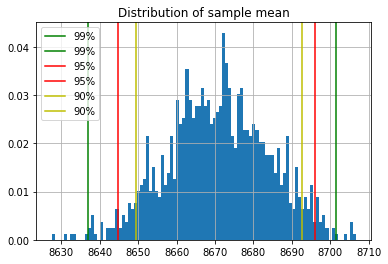

In [ ]:
# Gender - Female
ConfidenceInterval1(df, 'Gender', 'F')

Confidence interval - Gender : M
(412171,)
Mean :  9368.369036465447
Std : 7.87279572781685
Confidence interval - 99% is : [9347.72837356 9386.99566434]
Confidence interval - 95% is : [9351.68189423 9383.61721585]
Confidence interval - 90% is : [9355.35388928 9380.7906796 ]


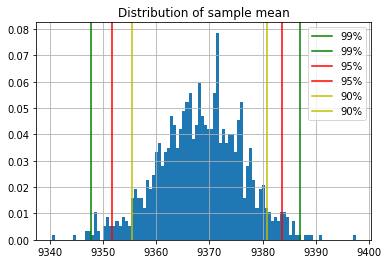

In [ ]:
# Gender - Male
ConfidenceInterval1(df, 'Gender', 'M')

<font color='#0dab7f'><b>Observation</b>: 

<font color='#0dab7f'> 1) Confidence interval of average male expense is not overlapping with female spend expense. 

<font color='#0dab7f'> 2) Average male expense is more than the average Female expense

<font color='#0dab7f'> 3) By changing the sample size average expenses did not change. But std deviation changes larger the sample size lesser the std deviation.

<font color='#0dab7f'><b>Recommendation</b>: Company can increase their business by targeting male customers and can provide offers on items mostly purchased by Male customers.

Confidence interval - Marital_Status : 0
(323242,)
Mean :  9201.296036468033
Std : 8.973037354559787
Confidence interval - 99% is : [9177.72440905 9224.35976884]
Confidence interval - 95% is : [9183.19558241 9218.50642398]
Confidence interval - 90% is : [9186.88501958 9216.12142265]


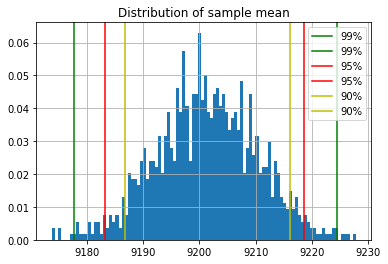

In [ ]:
# Marital status - Unmarried
ConfidenceInterval1(df, 'Marital_Status', 0)

Confidence interval - Marital_Status : 1
(224149,)
Mean :  9187.579001503464
Std : 10.549945427245433
Confidence interval - 99% is : [9161.46224681 9215.54423814]
Confidence interval - 95% is : [9166.67425072 9208.44090058]
Confidence interval - 90% is : [9171.06698178 9205.50934668]


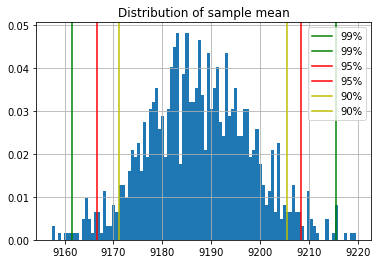

In [ ]:
# Marital status - Married
ConfidenceInterval1(df, 'Marital_Status', 1)

<font color='#0dab7f'><b>Observation</b>: 

<font color='#0dab7f'> 1) Confidence interval of average unmarried customer expense is overlapping with married customer spend expense. 

<font color='#0dab7f'> 2) Average expense by unmarried and married customer is around 9100 to 9200. 

<font color='#0dab7f'> 3) Eventhough there is overlapping of Confidence interval,  Average expense of unmarried customer is little higher when compared to married customer expense

<font color='#0dab7f'> 4) By changing the sample size average expenses did not change. But std deviation changes larger the sample size lesser the std deviation.

<font color='#0dab7f'><b>Recommendation</b>: Company can increase their business by targeting unmarried customers and can provide offers on items 
mostly purchased by unmarried customers.

Confidence interval - Age : 0-17
(15032,)
Mean :  8868.100740021287
Std : 40.34048076859545
Confidence interval - 99% is : [8763.92423929 8970.60236762]
Confidence interval - 95% is : [8791.26319851 8953.72542243]
Confidence interval - 90% is : [8802.79993015 8935.32273483]


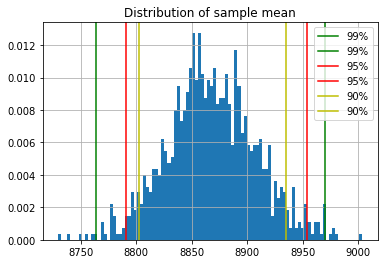

In [ ]:
ConfidenceInterval1(df, 'Age', '0-17')

Confidence interval - Age : 18-25
(99334,)
Mean :  9124.798323011255
Std : 16.29130293869369
Confidence interval - 99% is : [9082.91344097 9167.55760475]
Confidence interval - 95% is : [9094.56203415 9157.60442522]
Confidence interval - 90% is : [9097.84754062 9151.6948653 ]


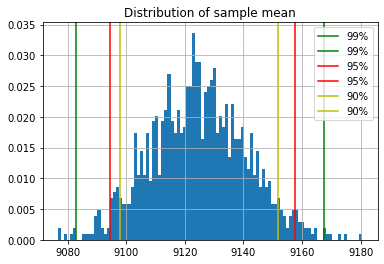

In [ ]:
ConfidenceInterval1(df, 'Age', '18-25')

Confidence interval - Age : 26-35
(218661,)
Mean :  9193.586562592323
Std : 10.601495523800361
Confidence interval - 99% is : [9168.57927484 9220.19581144]
Confidence interval - 95% is : [9173.90872309 9215.72453741]
Confidence interval - 90% is : [9177.27038932 9212.86783331]


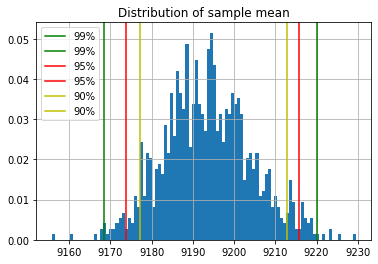

In [ ]:
ConfidenceInterval1(df, 'Age', '26-35')

Confidence interval - Age : 36-45
(109409,)
Mean :  9253.971499200246
Std : 15.364320370537905
Confidence interval - 99% is : [9214.30729337 9292.16168816]
Confidence interval - 95% is : [9224.49381061 9284.54341302]
Confidence interval - 90% is : [9229.71112477 9280.24502646]


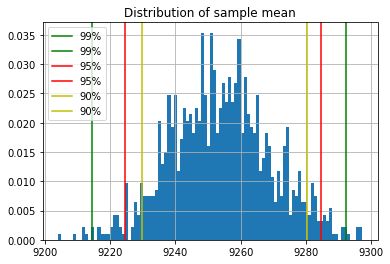

In [ ]:
ConfidenceInterval1(df, 'Age', '36-45')

Confidence interval - Age : 46-50
(45442,)
Mean :  9128.681074754633
Std : 23.35505561936294
Confidence interval - 99% is : [9073.95139452 9187.39380804]
Confidence interval - 95% is : [9083.39098741 9173.80550702]
Confidence interval - 90% is : [9088.68762929 9165.52801923]


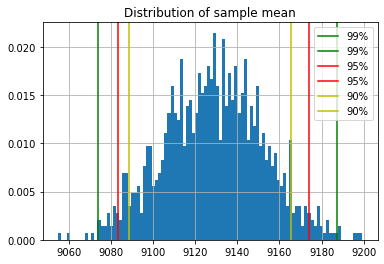

In [ ]:
ConfidenceInterval1(df, 'Age', '46-50')

Confidence interval - Age : 51-55
(38191,)
Mean :  9422.975432876856
Std : 26.001988436517923
Confidence interval - 99% is : [9358.65789126 9488.33561585]
Confidence interval - 95% is : [9372.13868451 9473.28266935]
Confidence interval - 90% is : [9378.99680684 9467.5003273 ]


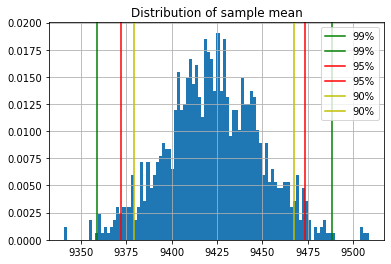

In [ ]:
ConfidenceInterval1(df, 'Age', '51-55')

Confidence interval - Age : 55+
(21322,)
Mean :  9216.506243832662
Std : 34.7074832293687
Confidence interval - 99% is : [9116.92245685 9304.8947798 ]
Confidence interval - 95% is : [9152.92705656 9287.91444048]
Confidence interval - 90% is : [9164.30141872 9275.43944986]


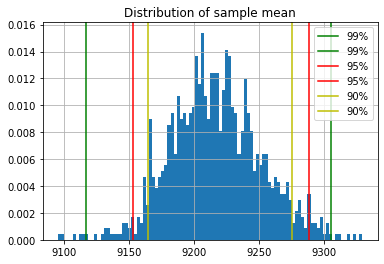

In [ ]:
ConfidenceInterval1(df, 'Age', '55+')

<font color='#0dab7f'><b>Observation</b>: 

<font color='#0dab7f'> 1) Confidence interval of average expense spent by Age group [18-25 years] is overlapping withaverage expense spent by Age group [46-50 years]. 

<font color='#0dab7f'> 2) Confidence interval of average expense spent by Age group [26-30 years] is overlapping withaverage expense spent by Age group [55+ years]. 

<font color='#0dab7f'> 3) Confidence interval average expense spent by Age group [51-55 years] is more when compared to other Age groups.

<font color='#0dab7f'> 4) By changing the sample size average expenses did not change. But std deviation changes larger the sample size lesser the std deviation.

<font color='#0dab7f'><b>Recommendation</b>: Company can increase their business by targeting Age group [51-55 years] and can provide offers on items mostly purchased by 51-55 years old customers.

<font color='33A2FF'><b>Actionable items for business:

<font color='#0dab7f'>1)  Company can increase their business by targeting male customers and can provide offers on items mostly purchased by Male customers.

<font color='#0dab7f'>2) Company can increase their business by targeting unmarried customers and can provide offers on items 
mostly purchased by unmarried customers.

<font color='#0dab7f'>3) Company can increase their business by targeting Age group [51-55 years] and can provide offers on items mostly purchased by 51-55 years old customers.

<font color='#0dab7f'>4) Company can increase there sales by providing offers to category C city customers.

<font color='#0dab7f'>5) Company can increase there sales by providing offers to customers who are new to city.

<font color='#0dab7f'>6) Company can  increase there sales by providing offers on product category 5.

<font color='#0dab7f'>7) Company can increase there sales by providing offers to occupation group is 4.